In [1]:
import numpy as np
import matplotlib.pyplot as plt

# シグモイド関数

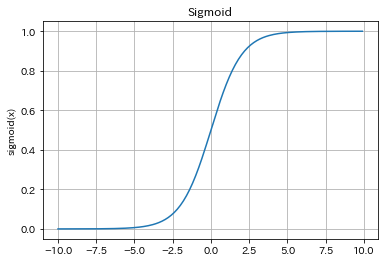

In [2]:
def sigmoid(x) :
    return 1.0 / (1.0 + np.exp(-1.0 * x))

x = np.arange(-10,10,0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylabel("sigmoid(x)")
plt.title("Sigmoid")
plt.grid(True)
plt.show()

# 順伝搬
* 順伝搬の概要
```
[入力 x] → [伝搬] → [出力（確率) y]
```
* 入力
$$
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
$$
* 伝搬
$$
\begin{bmatrix}
u_{1} \\
u_{2}
\end{bmatrix}
=
\begin{bmatrix}
w_{11} & w_{12} \\
w_{21} & w_{22}
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
+
\begin{bmatrix}
b_{1} \\
b_{2}
\end{bmatrix}
$$
* 出力 (確率)
$$
\begin{bmatrix}
y_{1} \\
y_{2}
\end{bmatrix}
=
f(
\begin{bmatrix}
u_{1} \\
u_{2}
\end{bmatrix}
)
$$
* 確率の最も大きなクラスを選ぶ




In [3]:
w = np.array([
    [0.1,0.2],
    [0.3,0.4]])
x = np.array([
    [1.0],
    [2.0]])
b = np.array([
    [0.5],
    [0.6]])
u = w.dot(x) + b

print("u=\n{}".format(u))

# wow! python is great.
y = sigmoid(u)

print("y=\n{}".format(y))

# select max element in y-array
print("decision=#{} (probability {})".format(np.argmax(y), y[np.argmax(y)]))


u=
[[1. ]
 [1.7]]
y=
[[0.73105858]
 [0.84553473]]
decision=#1 (probability [0.84553473])


# 逆伝搬
* 逆伝搬で計算した　Y のうち、最も確率の大きな y1を正解として選んだけど、本当は y0 が正解だったとする
* どうすれば y0 が選ばれるようになるか？ → y が
$$
t = 
\begin{bmatrix}
1.0 \\
0.0
\end{bmatrix}
$$
を出力するような w と b だったらよかった
* 正解値と出力値の誤差関数を定義して、その値が小さくなるように w,b を調整していく
$$
E(w,b) =  \frac{1}{2}  \sum_k (y_k - t_k)^2
$$
$$
E(w,b) \rightarrow min
$$
* 勾配降下法
$$
w = w -  \frac{\partial E}{\partial w} 
$$
    * w を増やしたら E が増えた → E を減らしたいので w を減らそう
    * w を増やしたら E が減った → E を減らしたいので w を増やそう
    * 偏微分の連鎖律より
$$
w = w -  \frac{\partial E}{\partial w} = w -  \frac{\partial E}{\partial y} \frac{\partial y}{\partial u} \frac{\partial u}{\partial w} 
$$
$$
\frac{\partial E}{\partial y} = \sum_k (y_k - t_k)
$$
$$
\frac{\partial y}{\partial u} = \frac{\partial \sigma (u)}{\partial u} = (1 - \sigma (u)) \sigma (u)
$$

In [5]:
t = np.array([
    [1.0],
    [0.0]])

def mean_squared_error(y,t) :
    return 0.5 * np.sum((y - t) ** 2)

e = mean_squared_error(y,t)
print(e)

0.3936292380393852
